In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (150, 150)
batch_size = 15

train_dir = "/kaggle/input/white-blood-cells-dataset/Train"
test_dir = "/kaggle/input/white-blood-cells-dataset/Test-A"  


train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.20
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'   
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical' 
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  
    shuffle=False
)


Found 8142 images belonging to 5 classes.
Found 2033 images belonging to 5 classes.
Found 4339 images belonging to 5 classes.


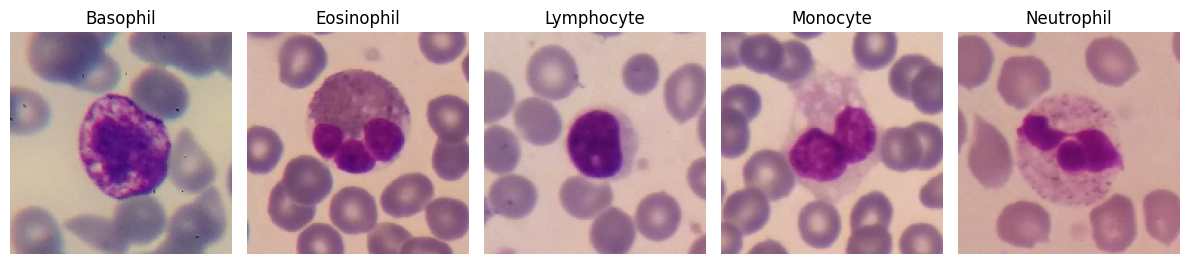

In [28]:
import matplotlib.pyplot as plt
import numpy as np

class_labels = list(train_generator.class_indices.keys())
plt.figure(figsize=(12,6))

for i, class_name in enumerate(class_labels):
    class_dir = f"{train_dir}/{class_name}"
    import os
    from tensorflow.keras.preprocessing import image
    img_name = os.listdir(class_dir)[0]
    img_path = os.path.join(class_dir, img_name)
    
    img = image.load_img(img_path, target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(1024, activation='relu'),
    
    Dense(5, activation='softmax')  
])
model.compile(
    loss='categorical_crossentropy',  
    optimizer='adam',
    metrics=['accuracy']
)
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)


Epoch 1/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.7686 - loss: 0.6277 - val_accuracy: 0.8411 - val_loss: 0.5815
Epoch 2/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.9368 - loss: 0.1742 - val_accuracy: 0.8455 - val_loss: 0.7681
Epoch 3/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - accuracy: 0.9613 - loss: 0.1140 - val_accuracy: 0.8588 - val_loss: 0.7067
Epoch 4/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9714 - loss: 0.0889 - val_accuracy: 0.8352 - val_loss: 0.7227
Epoch 5/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9802 - loss: 0.0603 - val_accuracy: 0.8697 - val_loss: 0.7611
Epoch 6/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.9847 - loss: 0.0419 - val_accuracy: 0.8574 - val_loss: 0.9202
Epoch 7/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.9890 - loss: 0.0336 - val_accuracy: 0.8441 - val_loss: 1.2913
Epoch 8/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.9913 - loss: 0.0293 - 

In [20]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

290/290 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9231 - loss: 0.6501
Test Accuracy: 0.935699462890625


In [27]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,008,529 (76.33 MB)

 Trainable params: 6,669,509 (25.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,339,020 (50.88 MB)

In [10]:
from tensorflow.keras.layers import Dropout

dropout_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.80),                  
    Dense(1024, activation='relu'),
    Dense(5, activation='softmax')
])
dropout_model.summary()
dropout_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_dropout = dropout_model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

dropout_test_loss, dropout_test_acc = dropout_model.evaluate(test_generator)

print("Dropout Test Accuracy =", dropout_test_acc)
print("Dropout Test Loss =", dropout_test_loss)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,669,509 (25.44 MB)

 Trainable params: 6,669,509 (25.44 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 45s 77ms/step - accuracy: 0.7110 - loss: 0.7724 - val_accuracy: 0.7969 - val_loss: 0.7266
Epoch 2/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - accuracy: 0.9024 - loss: 0.2732 - val_accuracy: 0.8436 - val_loss: 0.5618
Epoch 3/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - accuracy: 0.9084 - loss: 0.2544 - val_accuracy: 0.8623 - val_loss: 0.5680
Epoch 4/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - accuracy: 0.9289 - loss: 0.2005 - val_accuracy: 0.8485 - val_loss: 0.8771
Epoch 5/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9328 - loss: 0.1876 - val_accuracy: 0.8259 - val_loss: 0.6191
Epoch 6/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - accuracy: 0.9421 - loss: 0.1675 - val_accuracy: 0.8598 - val_loss: 0.8112
Epoch 7/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.9530 - loss: 0.1444 - val_accuracy: 0.8647 - val_loss: 1.0248
Epoch 8/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.9515 - loss: 0.1333 - 

In [12]:
print("\n===== PERFORMANCE COMPARISON =====")
print(f"Before Dropout: Accuracy = {test_acc:.4f} | Loss = {test_loss:.4f}")
print(f"After Dropout : Accuracy = {dropout_test_acc:.4f} | Loss = {dropout_test_loss:.4f}")



===== PERFORMANCE COMPARISON =====
Before Dropout: Accuracy = 0.9357 | Loss = 0.5943
After Dropout : Accuracy = 0.9546 | Loss = 0.2115


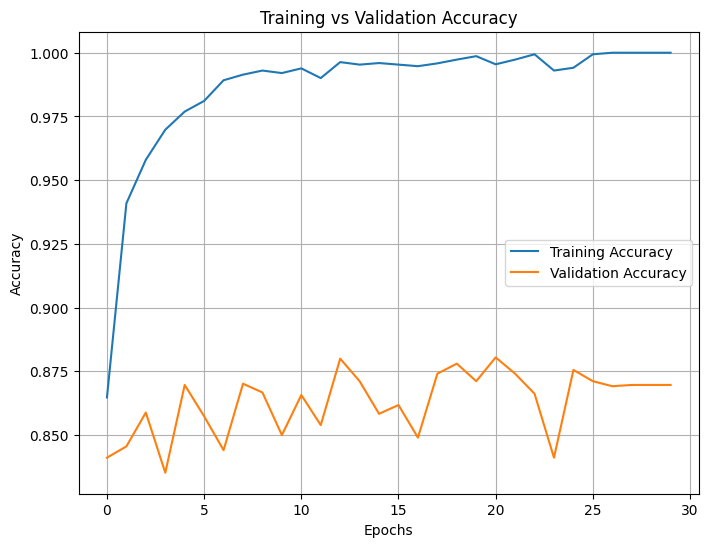

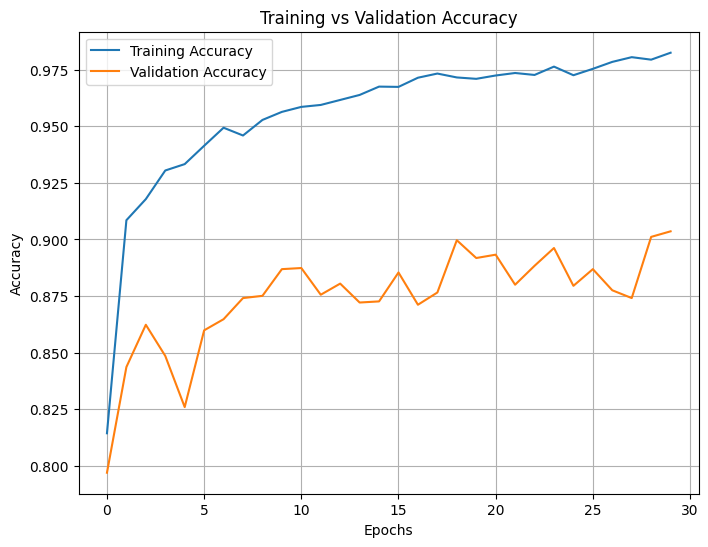

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8,6))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']

plt.figure(figsize=(8,6))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Found 4339 images belonging to 5 classes.
Generating predictions...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


290/290 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step

Classification Report:
              precision    recall  f1-score   support

    Basophil       0.91      0.90      0.90        89
  Eosinophil       0.69      0.88      0.77       322
  Lymphocyte       0.96      0.96      0.96      1034
    Monocyte       0.74      0.83      0.78       234
  Neutrophil       0.99      0.94      0.96      2660

    accuracy                           0.94      4339
   macro avg       0.86      0.90      0.88      4339
weighted avg       0.94      0.94      0.94      4339



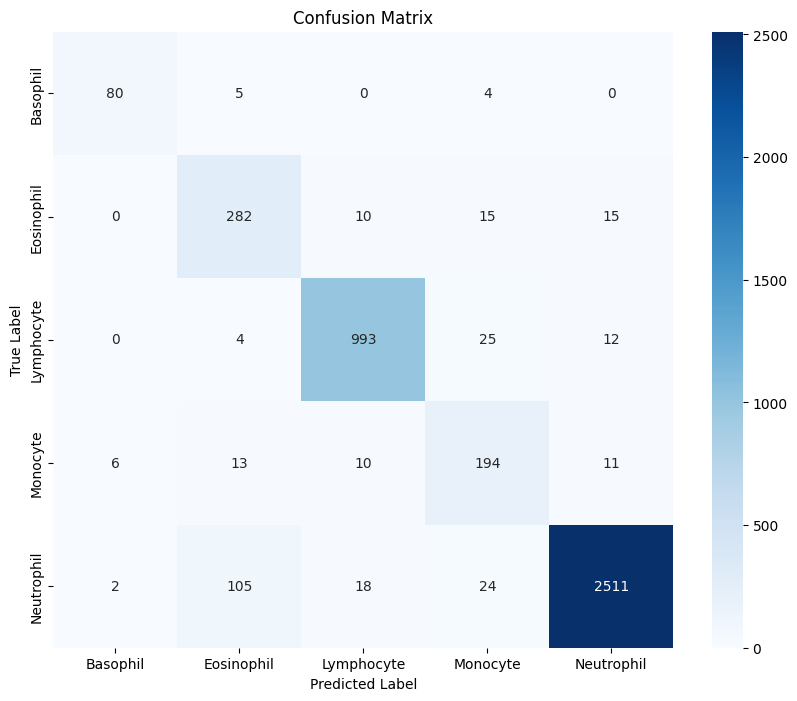

In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_datagen = ImageDataGenerator(rescale=1/255.0) 

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)

print("Generating predictions...")
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Found 4339 images belonging to 5 classes.
Generating predictions...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


290/290 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step

Classification Report:
              precision    recall  f1-score   support

    Basophil       0.99      0.98      0.98        89
  Eosinophil       0.79      0.89      0.83       322
  Lymphocyte       0.96      0.97      0.96      1034
    Monocyte       0.83      0.87      0.85       234
  Neutrophil       0.99      0.96      0.98      2660

    accuracy                           0.95      4339
   macro avg       0.91      0.93      0.92      4339
weighted avg       0.96      0.95      0.96      4339



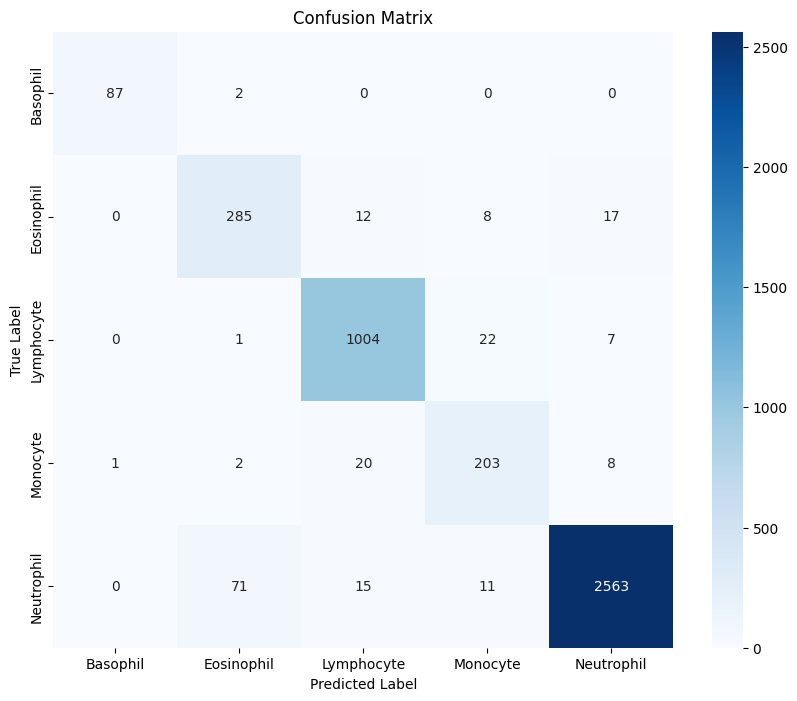

In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_datagen = ImageDataGenerator(rescale=1/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)

print("Generating predictions...")
predictions = dropout_model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()